## Test Loess Curve

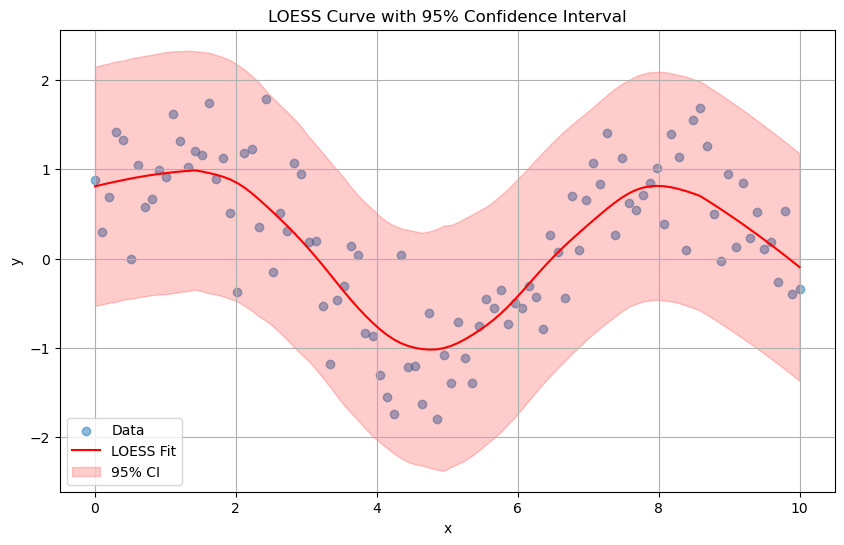

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate some noisy data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=100)

# Sort x and y for plotting purposes
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_sorted = y[sorted_idx]

# Fit LOESS using statsmodels
lowess = sm.nonparametric.lowess
loess_result = lowess(y_sorted, x_sorted, frac=0.3, return_sorted=True)

# Extract fitted values
x_fit = loess_result[:, 0]
y_fit = loess_result[:, 1]

# Bootstrap for standard error estimation
n_boot = 200
y_boots = np.zeros((n_boot, len(x_fit)))

for i in range(n_boot):
    sample_idx = np.random.choice(len(y_sorted), size=len(y_sorted), replace=True)
    y_sample = y_sorted[sample_idx]
    x_sample = x_sorted[sample_idx]
    loess_boot = lowess(y_sample, x_sample, frac=0.3, return_sorted=False)
    interp = np.interp(x_fit, x_sample, loess_boot)
    y_boots[i, :] = interp

# Compute standard error and 95% CI
y_std = np.std(y_boots, axis=0)
y_upper = y_fit + 1.96 * y_std
y_lower = y_fit - 1.96 * y_std

# Plot original data, LOESS fit, and error bars
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x_fit, y_fit, color='red', label='LOESS Fit')
plt.fill_between(x_fit, y_lower, y_upper, color='red', alpha=0.2, label='95% CI')
plt.xlabel("x")
plt.ylabel("y")
plt.title("LOESS Curve with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()
